<a href="https://colab.research.google.com/github/joeenn/Kapita-Selekta-Matematika-Terapan/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple model of KNN**

In [ ]:
import pandas as pd

data_table= {
    'X1': [7,7,3,1 ], 
    'X2': [7,4,4,4],
    'Kelas': ['Sunny', 'Sunny', 'Rain', 'Rain']
  }
  
df = pd.DataFrame(data_table)

df

,X1,X2,Kelas
0,7,7,Sunny
1,7,4,Sunny
2,3,4,Rain
3,1,4,Rain


In [ ]:
X = df.drop('Kelas', axis =1)
y = df.Kelas

X.iloc[[0]]

,X1,X2
0,7,7


In [ ]:
import numpy as np

def dist(X1,X2):
  return np.sqrt(np.sum((X1-X2)**2))

In [ ]:
Xtest = [3,7]

In [ ]:
D = np.array([[]])
for i in range(0, len(X)):
  D = np.append(D, [i, dist(np.array(X.iloc[[i]]),Xtest), y[i]])

D = np.reshape(D, (len(X), len(Xtest)+1))
D

array([['0', '4.0', 'Sunny'],
       ['1', '5.0', 'Sunny'],
       ['2', '3.0', 'Rain'],
       ['3', '3.605551275463989', 'Rain']], dtype='<U32')

In [ ]:
D = D[D[:,1].argsort()]
D

array([['2', '3.0', 'Rain'],
       ['3', '3.605551275463989', 'Rain'],
       ['0', '4.0', 'Sunny'],
       ['1', '5.0', 'Sunny']], dtype='<U32')

In [ ]:
k = 3
FinalD = D[0:k,:]
print(FinalD)

[['2' '3.0' 'Rain']
 ['3' '3.605551275463989' 'Rain']
 ['0' '4.0' 'Sunny']]


# **KNN in Machine Learning (Sklearn)**

Pada contoh kali ini, kita akan menggunakan data cuaca untuk bermain Tennis sebagai contoh dalam klasifikasi dnegan KNN.

<center> <img src = "https://www.ledburyreporter.co.uk/resources/images/12528364?type=responsive-gallery-fullscreen" align = "center" width= "400"> </center> 

Memanggil semua library yang digunakan

In [ ]:
import pandas as pd

data = pd.read_csv('tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


Cek Missing Value

In [ ]:
data.isna().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

## Splitting Data

Menentukan data X (response) dan y (class)

Dalam Contoh Kali ini fitur X hanya menggunakan kolom 'outlook' dan 'temp'. Sedangkan untuk kelas tetap menggunakan fitur 'play'



In [ ]:
X = data.drop(['humidity', 'windy', 'play'], axis =1)
y = data.play

X.head()

,outlook,temp
0,sunny,hot
1,sunny,hot
2,overcast,hot
3,rainy,mild
4,rainy,cool


Encoding Data categorial into numeric

In [ ]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)

X.head()

,outlook,temp
0,2,1
1,2,1
2,0,1
3,1,2
4,1,0


In [ ]:
y = le.fit_transform(y)

print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Teknik splitting data dengan Scikit-Learn

Training 60%, testing 40%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [ ]:
print(X_test)

    outlook  temp
8         2     0
5         1     0
3         1     2
2         0     1
7         2     2
13        1     2


## Training Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')

# Train the model using the training sets
classifier = model.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

## Evaluation

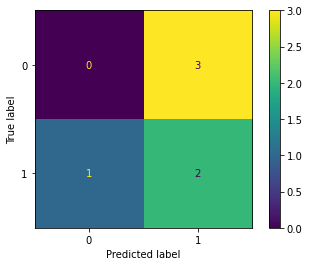

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[0 3]
 [1 2]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.67      0.50         3

    accuracy                           0.33         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.20      0.33      0.25         6

